# Utilizando algoritmo classificador com Aprendizagem Baseada em Instâncias (KNN) para a previsão de pagamento 

In [1]:
# Importando a biblioteca para a classificação do implementador dos votos dos k-vizinhos mais próximos e a biblioteca que irá carregar os dados de treinamento e teste
import pickle
from sklearn.neighbors import KNeighborsClassifier

In [2]:
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [3]:
# Verificando o shape dos atributos
X_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

In [6]:
# Primeiros testes do classificador de KNN
knn = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p=2)
knn.fit(X_base_treinamento, y_base_treinamento)

KNeighborsClassifier()

In [7]:
previsao = knn.predict(X_base_teste)

In [8]:
# Visualizando a Acurácia do algoritmo
from sklearn.metrics import accuracy_score, classification_report

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 98.6%


0.986

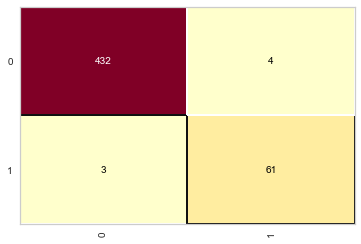

In [10]:
# Visualizando onde está a maior precisão do algoritmo, se no pagante ou não-pagante. Neste caso é nos não-pagantes, o que seria o ideal visto que o objetivo do algoritmo seria evitar a perda de dinheiro por emprestimo de um banco. 
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [11]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



#### O algoritmo consegue identificar corretamente 99% dos dados da classe 0 (Pagantes) com uma precisão de 99% e 95% dos dados da classe 1 (Não-Pagantes) com uma precisão de 94%.

# FIM